## **Sentiment analysis**

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer
ps = PorterStemmer()
# sns.set()

In [107]:
data = pd.read_csv('/content/Restaurant_Reviews.tsv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


 **Exploring Data**

<ipython-input-108-47d21a0a962c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Liked'], palette=['red', 'blue'])


<Axes: xlabel='Liked', ylabel='count'>

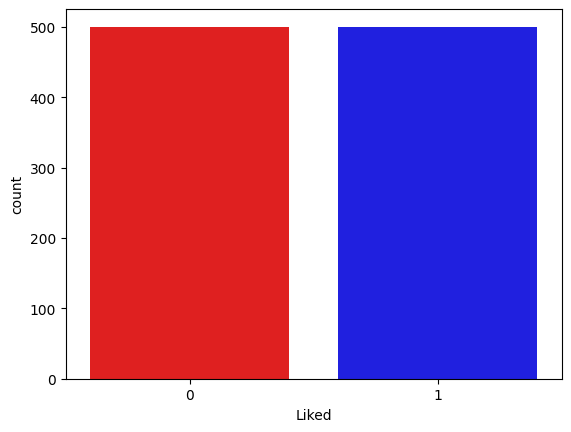

In [108]:
sns.countplot(x=data['Liked'], palette=['red', 'blue'])

In [109]:
data['Review letter count'] = data['Review'].apply(len)
data

,Review,Liked,Review letter count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


**pre-processing Data**

In [110]:
import nltk
from nltk.corpus import stopwords

In [111]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [112]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [113]:
s = data['Review'][0]
s

'Wow... Loved this place.'

In [114]:
import re
s = re.sub('[^a-zA-Z]'," ",s)
s

'Wow    Loved this place '

In [115]:
s = s.lower()
s

'wow    loved this place '

In [116]:
s = s.split()
s

['wow', 'loved', 'this', 'place']

In [117]:
temp = []

for word in s :
  if word not in stopwords.words('english'):
    temp.append(word)

temp

['wow', 'loved', 'place']

In [118]:
[word for word in s if word not in stopwords.words('english')]

['wow', 'loved', 'place']

In [119]:
s = ' '.join(temp)
s

'wow loved place'

In [120]:
from nltk.stem import PorterStemmer

In [121]:
ps = PorterStemmer()

In [122]:
s = ps.stem(s)
s

'wow loved plac'

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

In [124]:
cv = CountVectorizer()
cv.fit_transform(s.split()).toarray()

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [125]:
corpus = []

for i in range (len(data)):
  s = re.sub('[^a-zA-Z]'," ",data['Review'][i])
  s = s.lower()
  s = s.split()
  s = [word for word in s if word not in stopwords.words('english')]
  s = ' '.join(s)
  s = ps.stem(s)
  corpus.append(s)

corpus

['wow loved plac',
 'crust good',
 'tasty texture nasti',
 'stopped late may bank holiday rick steve recommendation lov',
 'selection menu great pric',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potatoes like rubber could tell made ahead time kept warm',
 'fries great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpr',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked signs indicate cash',
 'highly recommend',
 'waitress little slow servic',
 'place worth time let alone vega',
 'like',
 'burrittos blah',
 'food amaz',
 'service also cut',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street tacos friendly staff',
 'took hour get food tables restaurant food luke warm sever running around like totally overwhelm',
 'worst salmon sashimi',
 'also combos like burger fries beer dec

In [126]:
cv = CountVectorizer()

In [127]:
cv.fit_transform(corpus).toarray().shape

(1000, 1994)

In [128]:
X = cv.fit_transform(corpus).toarray()
y = data['Liked']

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [131]:
X_train.shape

(670, 1994)

In [132]:
X_test.shape

(330, 1994)

 **Model Training**

In [133]:
from sklearn.naive_bayes import MultinomialNB

In [134]:
clf = MultinomialNB()

In [135]:
clf.fit(X_train, y_train)

MultinomialNB()

**Model Prediction**

In [136]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,

In [137]:
y_test.values

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,

**Model Evaluation**

In [138]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [139]:
print(confusion_matrix(y_test , y_pred))

[[116  57]
 [ 32 125]]


In [140]:
accuracy = accuracy_score(y_test , y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7303030303030303


In [141]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       173
           1       0.69      0.80      0.74       157

    accuracy                           0.73       330
   macro avg       0.74      0.73      0.73       330
weighted avg       0.74      0.73      0.73       330



In [142]:
from sklearn.linear_model import LogisticRegression





In [143]:

model = LogisticRegression()

model.fit(X_train, y_train)


LogisticRegression()

In [144]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7545454545454545


## **Named Entity Recognition**

In [100]:
import numpy as np # linear algebra
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
data = pd.read_csv("/content/NER.csv",encoding = 'latin1')
data = data.fillna(method = 'ffill')
data.head()
# data.shape

FileNotFoundError: [Errno 2] No such file or directory: '/content/NER.csv'

In [ ]:
data.nunique()

In [ ]:
# Lowercase words
data['Word'] = data['Word'].str.lower()

In [ ]:
words = list(set(data["Word"].values))
words.append("ENDPAD")
num_words = len(words)
num_words

In [ ]:
words_tag = list(set(data["Tag"].values))
# words_tag.append("ENDPAD")
num_words_tag = len(words_tag)
num_words_tag

In [ ]:
num_words,num_words_tag
group = data.groupby(data["Sentence #"])
# group.groups

In [ ]:
class Get_sentence(object):
    def __init__(self,data):
        self.n_sent=1
        self.data = data
        agg_func = lambda s:[(w,p,t) for w,p,t in zip(s["Word"].values.tolist(),
                                                     s["POS"].values.tolist(),
                                                     s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [ ]:
getter = Get_sentence(data)
sentence = getter.sentences
sentence[0]

In [ ]:
word_idx = {w : i+1 for i ,w in enumerate(words)}
tag_idx =  {t : i for i ,t in enumerate(words_tag)}

In [ ]:
plt.hist([len(s) for s in sentence],bins= 50)
plt.xlabel("Length of Sentences")
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

max_len = 50
X = [[word_idx[w[0]] for w in s] for s in sentence]
X = pad_sequences(maxlen = max_len,sequences = X,padding = 'post',value = num_words-1)
y = [[tag_idx[w[2]] for w in s] for s in sentence]
y = pad_sequences(maxlen = max_len,sequences = y,padding = 'post',value = tag_idx['O'])
y = [to_categorical(i,num_classes = num_words_tag) for i in  y]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=1)

In [ ]:
from tensorflow.keras import Model,Input
from tensorflow.keras.layers import LSTM,Embedding,Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D,Bidirectional

In [ ]:
input_word = Input(shape = (max_len,))
model = Embedding(input_dim = num_words,output_dim = max_len,input_length = max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100,return_sequences = True, recurrent_dropout = 0.1))(model)
out = TimeDistributed(Dense(num_words_tag,activation = 'softmax'))(model)
model = Model(input_word,out)
model.summary()

In [ ]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# from livelossplot import PlotLossesKeras
early_stopping = EarlyStopping(monitor = 'val_accuracy',patience =2,verbose = 0,mode = 'max',restore_best_weights = False)
callbacks = [early_stopping]

history = model.fit(
    x_train,np.array(y_train),
    validation_split =0.2,
    batch_size = 64,
    epochs = 5,
    verbose =1
)

In [ ]:
model.evaluate(x_test,np.array(y_test))

In [ ]:
from tensorflow.keras.layers import GRU

input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=max_len, input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(GRU(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_words_tag, activation='softmax'))(model)
model = Model(input_word, out)
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Evaluate the model on the test set
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_accuracy',patience =2,verbose = 0,mode = 'max',restore_best_weights = False)
callbacks = [early_stopping]

history = model.fit(
    x_train,np.array(y_train),
    validation_split =0.2,
    batch_size = 64,
    epochs = 5,
    verbose =1
)




In [ ]:
model.evaluate(x_test,np.array(y_test))

In [ ]:
# Get user input for sentence
input_sentence = input("Enter a sentence to evaluate: ")

# Tokenize the input sentence
input_tokens = input_sentence.split()

# Convert tokens to lowercase
input_tokens_lower = [token.lower() for token in input_tokens]

# Convert tokens to indices using the word_idx mapping
input_indices = [word_idx.get(token, word_idx.get(token.lower(), 0)) for token in input_tokens]

# Pad or truncate the input sequence to match the expected length
input_indices = input_indices[:max_len] + [0] * (max_len - len(input_indices))

# Make prediction for the input sentence
prediction = model.predict(np.array([input_indices]))
predicted_labels = np.argmax(prediction, axis=-1)[0]

# Convert predicted labels to words
predicted_tags = [words_tag[idx] for idx in predicted_labels]

# Print the predicted tags for the input sentence
print("Predicted tags for the input sentence:")
for token, tag in zip(input_tokens, predicted_tags[:len(input_tokens)]):
    print(f"{token}: {tag}")


## **Text Summerization**

In [ ]:
# importing libiray
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

porter = PorterStemmer()

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation

In [ ]:
# normalization (Data Preprocessing)
def cleanText(text):
    text = text.lower()
    text = re.sub('[^\w\s]','',text)

    #Remove spaces at the beginning and at the end of the string
    text.strip()

    txt=[]
    for w in text.split():
        stemWord = porter.stem(w)
        txt.append(stemWord)
    txt = ' '.join(txt)
    return txt

In [ ]:
# reading the datasets (training - testing - validation)
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/train.csv')
val_df = pd.read_csv('/content/val.csv')
# train_df.head()
train_df.shape

In [ ]:
# Combine data from the three CSV files into a single DataFrame
pre = pd.DataFrame()
pre['text'] = pd.concat([train_df['document'], val_df['document'], test_df['document']], ignore_index=True)
pre['summary'] = pd.concat([train_df['summary'], val_df['summary'], test_df['summary']], ignore_index=True)
pre.head()

In [ ]:
pre['text'] = pre['text'].apply(cleanText)
pre['summary'] = pre['summary'].apply(cleanText)

In [ ]:
pre.shape
# pre.head()

In [ ]:
#check for null values
pre.isnull().sum()

In [ ]:
# Check on the most number of word in text
# Check how much % of text have 0-60 words
cnt = 0
for i in pre['text']:
    if len(i.split()) <= 70:
        cnt = cnt + 1
print(cnt / len(pre['text']))

In [ ]:
# Check on the most number of word in summary
# Check how much % of summary have 0-20 words
cnt = 0
for i in pre['summary']:
    if len(i.split()) <= 20:
        cnt = cnt + 1
print(cnt / len(pre['summary']))

In [ ]:
# Model to summarize the text between 0-20 words for Summary and 0-70 words for Text
max_text_len = 70
max_summary_len = 20

In [ ]:
# Select the Summaries and Text which fall below max length

import numpy as np

cleaned_text = np.array(pre['text'])
cleaned_summary = np.array(pre['summary'])

short_text = []
short_summary = []

for i in range(len(train_df)):
    if len(cleaned_summary[i].split()) <= max_summary_len and len(cleaned_text[i].split()) <= max_text_len:
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])

post_pre = pd.DataFrame({'text': short_text,'summary': short_summary})

post_pre.head(2)

In [ ]:
# Add sostok(start of the sequence) and eostok(end of the sequence)

post_pre['summary'] = post_pre['summary'].apply(lambda x: 'sostok ' + x \
        + ' eostok')

post_pre.head(2)

In [ ]:
# split the data into train and test data chunks.

from sklearn.model_selection import train_test_split

x_train ,x_test, y_train, y_test = train_test_split(
    np.array(post_pre["text"]),
    np.array(post_pre["summary"]),
    test_size=0.1,
    random_state=0,
    shuffle=True,
)

In [ ]:
# Tokenize the text to get the vocab count
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare a tokenizer on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_train))

# print(x_tokenizer.word_index)

In [ ]:
# print(x_tokenizer.word_index)
x_tokenizer.word_counts.items()

In [ ]:
#Find the percentage of occurrence of rare words (say, occurring less than 5 times) in the text.

cnt = 0
tot_cnt = 0

for key, value in x_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < 5:
        cnt = cnt + 1

print("% of rare words in vocabulary: ", (cnt / tot_cnt) * 100)

In [ ]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer(num_words = tot_cnt - cnt)
x_tokenizer.fit_on_texts(list(x_train))

# Convert text sequences to integer sequences
x_train_seq = x_tokenizer.texts_to_sequences(x_train)
x_test_seq = x_tokenizer.texts_to_sequences(x_test)

# Pad zero upto maximum length
x_train = pad_sequences(x_train_seq,  maxlen=max_text_len, padding='post')
x_test = pad_sequences(x_test_seq, maxlen=max_text_len, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

In [ ]:
# Prepare a tokenizer on testing data
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))

cnt = 0
tot_cnt = 0

for key, value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < 5:
        cnt = cnt + 1

print("% of rare words in vocabulary:",(cnt / tot_cnt) * 100)

# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
y_tokenizer.fit_on_texts(list(y_train))

# Convert text sequences to integer sequences
y_train_seq = y_tokenizer.texts_to_sequences(y_train)
y_test_seq = y_tokenizer.texts_to_sequences(y_test)

# Pad zero upto maximum length
y_train = pad_sequences(y_train_seq, maxlen=max_summary_len, padding='post')
y_test = pad_sequences(y_test_seq, maxlen=max_summary_len, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
latent_dim = 300
embedding_dim = 200

# Encoder
encoder_inputs = Input(shape=(max_text_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
    decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()


In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [ ]:
# y_train[0][0:-7]
# y_train.reshape(y_train.shape[0], y_train.shape[1], 1)[:,1:]
x_train.dtype

In [ ]:
# xt = np.array(x_train)
# yt = np.array(y_train)

# yt = np.reshape(y_train.shape[0], y_train.shape[1], 1)

y_train.shape
# gg = np.array([[1,2,3],])
# gg.shape[1]

# nn = np.reshape(gg, 3)
# nn
# x_train, y_train[0][0:-7]

In [ ]:
history = model.fit(
    [x_train, y_train[:, :-1]],
    y_train.reshape(y_train.shape[0], y_train.shape[1], 1)[:, 1:],
    epochs=4,
    callbacks=[es],
    batch_size=128,
    validation_data=([x_test, y_test[:, :-1]],y_test.reshape(y_test.shape[0], y_test.shape[1], 1)[:, 1:]),
    )

In [ ]:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index


In [ ]:
# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq]
                + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'eostok' or len(decoded_sentence.split()) \
            >= max_summary_len - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

In [ ]:
# seq2summary() and seq2text() which convert numeric-representation to string-representation of summary and text respectively.
# To convert sequence to summary
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i != target_word_index['sostok'] and i \
            != target_word_index['eostok']:
            newString = newString + reverse_target_word_index[i] + ' '

    return newString


# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

In [ ]:
for i in range(0, 19):
    print ('Review:', seq2text(x_train[i]))
    print ('Original summary:', seq2summary(y_train[i]))
    print ('Predicted summary:', decode_sequence(x_train[i].reshape(1,max_text_len)))
    print ('\n')

## **Machine Translation**

In [ ]:
!pip install "tensorflow-text>=2.11";
!pip install einops;

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GRU, Conv1D, GlobalMaxPooling1D, TimeDistributed, Dropout, RepeatVector, Concatenate
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import pickle
import os
import typing
from typing import Any, Tuple
import einops
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import tensorflow_text as tf_text
from collections import Counter
import string
import re
import pathlib

In [ ]:
data1 = pd.read_csv("/content/ara_eng.txt", delimiter="\t", names=["english", "arabic"])

In [ ]:
data1

In [ ]:
data2 = pd.read_csv("/content/ara_eng.txt", delimiter="\t", names=['english', 'arabic', 'CC'])

In [ ]:
data2.drop('CC', inplace=True, axis=1)
data2

In [ ]:
data = pd.concat([data1, data2], ignore_index=True)

In [ ]:
data.head()

In [ ]:
num_duplicates = data.duplicated().sum()
print(f"Number of Duplicate Rows: {num_duplicates}")

In [ ]:
# Remove duplicates from data
data = data.drop_duplicates()

In [ ]:
data.info()

In [ ]:
import plotly.subplots as sp
import plotly.graph_objects as go

input_lengths = [len(seq.split()) for seq in data['english']]
output_lengths = [len(seq.split()) for seq in data['arabic']]

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('English Sentence Lengths', 'Arabic Sentence Lengths'))

hist_input = go.Histogram(x=input_lengths, nbinsx=50, name='English')
hist_output = go.Histogram(x=output_lengths, nbinsx=50, name='Arabic')

fig.add_trace(hist_input, row=1, col=1)
fig.add_trace(hist_output, row=1, col=2)

fig.update_layout(showlegend=False, title_text='Distribution of Sentence Lengths')
fig.update_xaxes(title_text='Sentence Length', row=1, col=1)
fig.update_xaxes(title_text='Sentence Length', row=1, col=2)

fig.show()

In [ ]:
import plotly.graph_objects as go

unique_words_input = len(set(word for seq in data['english'] for word in seq.split()))
unique_words_output = len(set(word for seq in data['arabic'] for word in seq.split()))

fig = go.Figure()

fig.add_trace(go.Bar(x=['English'], y=[unique_words_input], name='English'))
fig.add_trace(go.Bar(x=['Arabic'], y=[unique_words_output], name='Arabic'))

fig.update_layout(title_text='Total Number of Unique Words in Each Language', barmode='group', xaxis_title='Language', yaxis_title='Total Unique Words')

fig.show()

In [ ]:
# Function to remove punctuation from a sentence
def remove_punctuation(sentence):
    translator = str.maketrans("", "", string.punctuation)
    return sentence.translate(translator)

# Combine all English sentences into a single string and remove punctuation
all_english_sentences = ' '.join(data['english'])
# all_english_sentences = remove_punctuation(all_english_sentences)

# Combine all Arabic sentences into a single string and remove punctuation
all_arabic_sentences = ' '.join(data['arabic'])
# all_arabic_sentences = remove_punctuation(all_arabic_sentences)

# Count word frequencies in English sentences
english_word_counts = Counter(all_english_sentences.lower().split())

# Count word frequencies in Arabic sentences
arabic_word_counts = Counter(all_arabic_sentences.split())

target_freq = 1

# Display the number of words that occur more than 100 times for English
print(f"English Words with Frequency equals {target_freq}:")
total = 0
for word, count in english_word_counts.items():
    if count == target_freq:
        total += 1
#         print(f"{word}: {count}")
print(total)

# Display the number of words that occur more than 100 times for Arabic
print(f"Arabic Words with Frequency equals {target_freq}:")
total = 0
for word, count in arabic_word_counts.items():
    if count == target_freq:
        total += 1
#         print(f"{word}: {count}")
print(total)


In [ ]:
import plotly.express as px

# Count the number of entries with only less than 6 words for English
english_one_word_count = data['english'].apply(lambda x: 1 if len(str(x).split()) < 6 else 0).sum()

# Count the number of entries with only less than 6 words for Arabic
arabic_one_word_count = data['arabic'].apply(lambda x: 1 if len(str(x).split()) < 6 else 0).sum()

# Create a DataFrame for the plot
info = {'Language': ['English', 'Arabic'], 'Entries with less than 6 words': [english_one_word_count, arabic_one_word_count]}
df_plot = pd.DataFrame(info)

# Plot the graph using Plotly Express
fig = px.bar(df_plot, x='Language', y='Entries with less than 6 words', text='Entries with less than 6 words',
             title='Number of Entries with less than 6 words',
             labels={'Entries with less than 6 words': 'Number of Entries'})

# Show the plot
fig.show()


In [ ]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# Parameters for padding and OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
max_sequence_length = 10


# Tokenize English sentences
english_tokenizer = Tokenizer(oov_token=oov_tok,
                              lower=True)
english_tokenizer.fit_on_texts(train_df['english'])
english_vocab_size = len(english_tokenizer.word_index) + 1

# Tokenize English sentences
arabic_tokenizer = Tokenizer(oov_token=oov_tok,
                             lower=True)
arabic_tokenizer.fit_on_texts(train_df['arabic'])
arabic_vocab_size = len(arabic_tokenizer.word_index) + 1

In [ ]:
# Save the tokenizers
directory = './tokenizer/'
if not os.path.exists(directory):
    os.makedirs(directory)

with open('./tokenizer/simple_english_tokenizer.pickle', 'wb+') as handle:
    pickle.dump(english_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('./tokenizer/simple_arabic_tokenizer.pickle', 'wb+') as handle:
    pickle.dump(arabic_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Convert text sequences to integer sequences
train_input_sequences = english_tokenizer.texts_to_sequences(train_df['english'])
train_output_sequences = arabic_tokenizer.texts_to_sequences(train_df['arabic'])

test_input_sequences = english_tokenizer.texts_to_sequences(test_df['english'])
test_output_sequences = arabic_tokenizer.texts_to_sequences(test_df['arabic'])


In [ ]:
# Pad sequences to have the same length
train_input_sequences = pad_sequences(train_input_sequences, maxlen=max_sequence_length, padding=padding_type, truncating=trunc_type)
train_output_sequences = pad_sequences(train_output_sequences, maxlen=max_sequence_length, padding=padding_type, truncating=trunc_type)

test_input_sequences = pad_sequences(test_input_sequences, maxlen=max_sequence_length, padding=padding_type, truncating=trunc_type)
test_output_sequences = pad_sequences(test_output_sequences, maxlen=max_sequence_length, padding=padding_type, truncating=trunc_type)

Test the tokenizers

In [ ]:
english_tokenizer.sequences_to_texts(train_input_sequences[0:5])

In [ ]:
arabic_tokenizer.sequences_to_texts(train_output_sequences[:5])

Split the datasets

In [ ]:
BATCH_SIZE = 256

In [ ]:
is_train = np.random.uniform(size=(len(train_input_sequences),)) < 0.9

train_ds = tf.data.Dataset.from_tensor_slices((train_input_sequences[is_train], train_output_sequences[is_train])).batch(BATCH_SIZE)
validation_ds = tf.data.Dataset.from_tensor_slices((train_input_sequences[~is_train], train_output_sequences[~is_train])).batch(BATCH_SIZE)
test_ds = tf.data.Dataset.from_tensor_slices((test_input_sequences, test_output_sequences)).batch(BATCH_SIZE)

In [ ]:
def checkpoint_callback(model_name):
    return ModelCheckpoint(filepath=f"./models/{model_name}.keras2",
                           save_weights_only=False,
                           monitor='val_accuracy',
                           mode='max',
                           save_best_only=True)

 **LSTM Model**

In [ ]:
BD_LSTM = tf.keras.Sequential([
    Embedding(english_vocab_size, 256, mask_zero=True),
    Bidirectional(LSTM(256)),
    RepeatVector(max_sequence_length),
    Bidirectional(LSTM(256, return_sequences=True)),
    TimeDistributed(Dense(arabic_vocab_size, activation='softmax'))
])

In [ ]:
BD_LSTM.compile(optimizer=tf.keras.optimizers.RMSprop(),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
LSTM_history = BD_LSTM.fit(train_ds,
        epochs=2,
        batch_size=BATCH_SIZE,
        validation_data=validation_ds)

**GRU Model**

In [ ]:
GRU = tf.keras.Sequential([
    Embedding(english_vocab_size, 256, input_length=max_sequence_length, mask_zero=True),
    GRU(256),
    RepeatVector(max_sequence_length),
    GRU(256, return_sequences=True),
    Dense(arabic_vocab_size, activation='softmax')
])

In [ ]:
GRU.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
GRU_history = GRU.fit(train_ds,
            epochs=2,
            batch_size=BATCH_SIZE,
            validation_data=validation_ds,)

Model Evaluation

In [ ]:
BD_LSTM_loss, BD_LSTM_accuracy = BD_LSTM.evaluate(test_input_sequences, test_output_sequences)
GRU_loss, GRU_accuracy = GRU.evaluate(test_input_sequences, test_output_sequences)

In [ ]:
# Create a DataFrame for comparison
results_df = pd.DataFrame({
    'Model': ['LSTM', 'GRU'],
    'Loss': [BD_LSTM_loss, GRU_loss],
    'Accuracy': [BD_LSTM_accuracy, GRU_accuracy]
})

print(results_df)

Word Tokenizer

In [ ]:
# Load context and target sentences
def load_data(data):
  context = np.array([context for context in data["english"]])
  target = np.array([target for target in data["arabic"]])

  return target, context

In [ ]:
target_raw, context_raw = load_data(data)
print(context_raw[-1])

In [ ]:
print(target_raw[-1])

In [ ]:
BUFFER_SIZE = len(context_raw)
BATCH_SIZE = 64

# Train - Validation Split
is_train = np.random.uniform(size=(len(target_raw),)) < 0.8

train_raw = (
    tf.data.Dataset
    .from_tensor_slices((context_raw, target_raw))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE))

val_raw = (
    tf.data.Dataset
    .from_tensor_slices((context_raw[~is_train], target_raw[~is_train]))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE))

In [ ]:
for example_context_strings, example_target_strings in train_raw.take(1):
  print(example_context_strings[:5][0].numpy().decode())
  print()
  print(example_target_strings[:5][0].numpy().decode())
  break

In [ ]:
def tf_lower_and_split_punct(text):
  # Split accented characters.
  text = tf_text.normalize_utf8(text, 'NFKD')
  text = tf.strings.lower(text)
  # Keep space, a to z, and select punctuation.
  text = tf.strings.regex_replace(text, '[^ a-zا-ي.?!,¿]', '')
  # Add spaces around punctuation.
  text = tf.strings.regex_replace(text, '[.?!,¿]', r' \0 ')
  # Strip whitespace.
  text = tf.strings.strip(text)

  text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
  return text

In [ ]:
example_text = tf.constant(target_raw[-1])

print(example_text.numpy().decode())
print(tf_lower_and_split_punct(example_text).numpy().decode())

In [ ]:
max_vocab_size = 60000

context_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size,
    ragged=True)

In [ ]:
context_text_processor.adapt(train_raw.map(lambda context, target: context))

# Here are the first 10 words from the vocabulary:
print(context_text_processor.get_vocabulary()[:10])
print(context_text_processor.get_vocabulary()[-10:])
print(len(context_text_processor.get_vocabulary()))

In [ ]:
target_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size,
    ragged=True)

target_text_processor.adapt(train_raw.map(lambda context, target: target))
print(target_text_processor.get_vocabulary()[:10])
print(len(target_text_processor.get_vocabulary()))

In [ ]:
example_tokens = context_text_processor(example_context_strings)
context_vocab = np.array(context_text_processor.get_vocabulary())
tokens = context_vocab[example_tokens[0].numpy()]
' '.join(tokens)

In [ ]:
def process_text(context, target):
  context = context_text_processor(context).to_tensor()
  target = target_text_processor(target)
  targ_in = target[:,:-1].to_tensor()
  targ_out = target[:,1:].to_tensor()
  return (context, targ_in), targ_out


train_ds = train_raw.map(process_text, tf.data.AUTOTUNE)
val_ds = val_raw.map(process_text, tf.data.AUTOTUNE)

**Model Architecture**

In [ ]:
UNITS = 1024

Encoder

In [ ]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, text_processor, units):
    super(Encoder, self).__init__()
    self.text_processor = text_processor
    self.vocab_size = text_processor.vocabulary_size()
    self.units = units

    # The embedding layer converts tokens to vectors
    self.embedding = tf.keras.layers.Embedding(self.vocab_size, units,
                                               mask_zero=True)

    # The RNN layer processes those vectors sequentially.
    self.rnn = tf.keras.layers.Bidirectional(
        merge_mode='sum',
        layer=tf.keras.layers.GRU(units,
                            # Return the sequence and state
                            return_sequences=True,
                            recurrent_initializer='glorot_uniform'))

  def call(self, x):
    # 2. The embedding layer looks up the embedding vector for each token.
    x = self.embedding(x)

    # 3. The GRU processes the sequence of embeddings.
    x = self.rnn(x)

    # 4. Returns the new sequence of embeddings.
    return x

  def convert_input(self, texts):
    texts = tf.convert_to_tensor(texts)
    if len(texts.shape) == 0:
      texts = tf.convert_to_tensor(texts)[tf.newaxis]
    context = self.text_processor(texts).to_tensor()
    context = self(context)
    return context

In [ ]:
class CrossAttention(tf.keras.layers.Layer):
  def __init__(self, units, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(key_dim=units, num_heads=1, **kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()

  def call(self, x, context):
    attn_output, attn_scores = self.mha(
        query=x,
        value=context,
        return_attention_scores=True)

    # Cache the attention scores for plotting later.
    attn_scores = tf.reduce_mean(attn_scores, axis=1)
    self.last_attention_weights = attn_scores

    x = self.add([x, attn_output])
    x = self.layernorm(x)

    return x

Decoder

In [ ]:
class Decoder(tf.keras.layers.Layer):
  @classmethod
  def add_method(cls, fun):
    setattr(cls, fun.__name__, fun)
    return fun

  def __init__(self, text_processor, units):
    super(Decoder, self).__init__()
    self.text_processor = text_processor
    self.vocab_size = text_processor.vocabulary_size()
    self.word_to_id = tf.keras.layers.StringLookup(
        vocabulary=text_processor.get_vocabulary(),
        mask_token='', oov_token='[UNK]')
    self.id_to_word = tf.keras.layers.StringLookup(
        vocabulary=text_processor.get_vocabulary(),
        mask_token='', oov_token='[UNK]',
        invert=True)
    self.start_token = self.word_to_id('[START]')
    self.end_token = self.word_to_id('[END]')

    self.units = units


    # 1. The embedding layer converts token IDs to vectors
    self.embedding = tf.keras.layers.Embedding(self.vocab_size,
                                               units, mask_zero=True)

    # 2. The RNN keeps track of what's been generated so far.
    self.rnn = tf.keras.layers.GRU(units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

    # 3. The RNN output will be the query for the attention layer.
    self.attention = CrossAttention(units)

    # 4. This fully connected layer produces the logits for each
    # output token.
    self.output_layer = tf.keras.layers.Dense(self.vocab_size)

@Decoder.add_method
def call(self,
        context, x,
        state=None,
        return_state=False):

  # 1. Lookup the embeddings
  x = self.embedding(x)

  # 2. Process the target sequence.
  x, state = self.rnn(x, initial_state=state)

  # 3. Use the RNN output as the query for the attention over the context.
  x = self.attention(x, context)
  self.last_attention_weights = self.attention.last_attention_weights

  # Step 4. Generate logit predictions for the next token.
  logits = self.output_layer(x)

  if return_state:
    return logits, state
  else:
    return logits

@Decoder.add_method
def get_initial_state(self, context):
  batch_size = tf.shape(context)[0]
  start_tokens = tf.fill([batch_size, 1], self.start_token)
  done = tf.zeros([batch_size, 1], dtype=tf.bool)
  embedded = self.embedding(start_tokens)
  return start_tokens, done, self.rnn.get_initial_state(embedded)[0]

@Decoder.add_method
def tokens_to_text(self, tokens):
  words = self.id_to_word(tokens)
  result = tf.strings.reduce_join(words, axis=-1, separator=' ')
  result = tf.strings.regex_replace(result, '^ *\[START\] *', '')
  result = tf.strings.regex_replace(result, ' *\[END\] *$', '')
  return result

@Decoder.add_method
def get_next_token(self, context, next_token, done, state, temperature = 0.0):
  logits, state = self(
    context, next_token,
    state = state,
    return_state=True)

  if temperature == 0.0:
    next_token = tf.argmax(logits, axis=-1)
  else:
    logits = logits[:, -1, :]/temperature
    next_token = tf.random.categorical(logits, num_samples=1)

  # If a sequence produces an `end_token`, set it `done`
  done = done | (next_token == self.end_token)
  # Once a sequence is done it only produces 0-padding.
  next_token = tf.where(done, tf.constant(0, dtype=tf.int64), next_token)

  return next_token, done, state

Encoder-Decoder Model

In [ ]:
class Translator(tf.keras.Model):
  @classmethod
  def add_method(cls, fun):
    setattr(cls, fun.__name__, fun)
    return fun

  def __init__(self, units,
               context_text_processor,
               target_text_processor):
    super().__init__()
    # Build the encoder and decoder
    encoder = Encoder(context_text_processor, units)
    decoder = Decoder(target_text_processor, units)

    self.encoder = encoder
    self.decoder = decoder

  def call(self, inputs):
    context, x = inputs
    context = self.encoder(context)
    logits = self.decoder(context, x)

    #TODO(b/250038731): remove this
    try:
      # Delete the keras mask, so keras doesn't scale the loss+accuracy.
      del logits._keras_mask
    except AttributeError:
      pass

    return logits

@Translator.add_method
def translate(self,
              texts, *,
              max_length=50,
              temperature=0.0):
  # Process the input texts
  context = self.encoder.convert_input(texts)
  batch_size = tf.shape(texts)[0]

  # Setup the loop inputs
  tokens = []
  attention_weights = []
  next_token, done, state = self.decoder.get_initial_state(context)

  for _ in range(max_length):
    # Generate the next token
    next_token, done, state = self.decoder.get_next_token(
        context, next_token, done,  state, temperature)

    # Collect the generated tokens
    tokens.append(next_token)
    attention_weights.append(self.decoder.last_attention_weights)

    if tf.executing_eagerly() and tf.reduce_all(done):
      break

  # Stack the lists of tokens and attention weights.
  tokens = tf.concat(tokens, axis=-1)   # t*[(batch 1)] -> (batch, t)
  self.last_attention_weights = tf.concat(attention_weights, axis=1)  # t*[(batch 1 s)] -> (batch, t s)

  result = self.decoder.tokens_to_text(tokens)
  return result

Define Masked Loss and Accuracy

In [ ]:
def masked_loss(y_true, y_pred):
    # Calculate the loss for each item in the batch.
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')
    loss = loss_fn(y_true, y_pred)

    # Mask off the losses on padding.
    mask = tf.cast(y_true != 0, loss.dtype)
    loss *= mask

    # Return the total.
    return tf.reduce_sum(loss)/tf.reduce_sum(mask)

In [ ]:
def masked_acc(y_true, y_pred):
    # Calculate the loss for each item in the batch.
    y_pred = tf.argmax(y_pred, axis=-1)
    y_pred = tf.cast(y_pred, y_true.dtype)

    match = tf.cast(y_true == y_pred, tf.float32)
    mask = tf.cast(y_true != 0, tf.float32)

    return tf.reduce_sum(match)/tf.reduce_sum(mask)

In [ ]:
model = Translator(UNITS, context_text_processor, target_text_processor)

In [ ]:
model.compile(optimizer='adam',
              loss=masked_loss,
              metrics=[masked_acc])

Subword Tokenizer

In [ ]:
from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab
import tensorflow_text as text

In [ ]:
bert_tokenizer_params=dict(lower_case=True)
reserved_tokens=["[PAD]", "[UNK]", "[START]", "[END]"]

bert_vocab_args = dict(
    # The target vocabulary size
    vocab_size = 40000,
    # Reserved tokens that must be included in the vocabulary
    reserved_tokens=reserved_tokens,
    # Arguments for `text.BertTokenizer`
    bert_tokenizer_params=bert_tokenizer_params,
    # Arguments for `wordpiece_vocab.wordpiece_tokenizer_learner_lib.learn`
    learn_params={},
)

In [ ]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
train_en_raw = tf.constant(train_df['english'].values)
train_ar_raw = tf.constant(train_df['arabic'].values)

In [ ]:
is_train = np.random.uniform(size=(len(train_en_raw),)) < 0.8
BUFFER_SIZE = len(train_en_raw)
BATCH_SIZE = 16

# Train And Validation Split
train_ds = (tf.data.Dataset
                    .from_tensor_slices((train_en_raw, train_ar_raw)))

validation_ds = (tf.data.Dataset
                    .from_tensor_slices((train_en_raw[~is_train], train_ar_raw[~is_train])))

In [ ]:
# Extract English And Arabic sentences for tokenization
train_en = train_ds.map(lambda en, ar: en)
train_ar = train_ds.map(lambda en, ar: ar)

In [ ]:
def write_vocab_file(filepath, vocab):
  with open(filepath, 'w') as f:
    for token in vocab:
      print(token, file=f)

In [ ]:
# Train the tokenizers on the data
ar_vocab = bert_vocab.bert_vocab_from_dataset(
    train_ar.prefetch(tf.data.AUTOTUNE),
    **bert_vocab_args
)

en_vocab = bert_vocab.bert_vocab_from_dataset(
    train_en.prefetch(tf.data.AUTOTUNE),
    **bert_vocab_args
)

In [ ]:
# Save the tokenizers' vocabulary
directory = './tokenizer/subword/'
if not os.path.exists(directory):
    os.makedirs(directory)

write_vocab_file('./tokenizer/subword/ar_vocab.txt', ar_vocab)
write_vocab_file('./tokenizer/subword/en_vocab.txt', en_vocab)

Create The Tokenizer

In [ ]:
START = tf.argmax(tf.constant(reserved_tokens) == "[START]")
END = tf.argmax(tf.constant(reserved_tokens) == "[END]")

In [ ]:
def add_start_end(ragged):
  count = ragged.bounding_shape()[0]
  starts = tf.fill([count,1], START)
  ends = tf.fill([count,1], END)
  return tf.concat([starts, ragged, ends], axis=1)

def cleanup_text(reserved_tokens, token_txt):
  # Drop the reserved tokens, except for "[UNK]".
  bad_tokens = [re.escape(tok) for tok in reserved_tokens if tok != "[UNK]"]
  bad_token_re = "|".join(bad_tokens)

  bad_cells = tf.strings.regex_full_match(token_txt, bad_token_re)
  result = tf.ragged.boolean_mask(token_txt, ~bad_cells)

  # Join them into strings.
  result = tf.strings.reduce_join(result, separator=' ', axis=-1)

  return result

class CustomTokenizer(tf.Module):
  def __init__(self, reserved_tokens, vocab_path):
    self.tokenizer = text.BertTokenizer(vocab_path, lower_case=True)
    self._reserved_tokens = reserved_tokens
    self._vocab_path = tf.saved_model.Asset(vocab_path)

    vocab = pathlib.Path(vocab_path).read_text().splitlines()
    self.vocab = tf.Variable(vocab)

    ## Create the signatures for export:

    # Include a tokenize signature for a batch of strings.
    self.tokenize.get_concrete_function(
        tf.TensorSpec(shape=[None], dtype=tf.string))

    # Include `detokenize` and `lookup` signatures for:
    #   * `Tensors` with shapes [tokens] and [batch, tokens]
    #   * `RaggedTensors` with shape [batch, tokens]
    self.detokenize.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int64))
    self.detokenize.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int64))

    self.lookup.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int64))
    self.lookup.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int64))

    # These `get_*` methods take no arguments
    self.get_vocab_size.get_concrete_function()
    self.get_vocab_path.get_concrete_function()
    self.get_reserved_tokens.get_concrete_function()

  @tf.function
  def tokenize(self, strings):
    enc = self.tokenizer.tokenize(strings)
    # Merge the `word` and `word-piece` axes.
    enc = enc.merge_dims(-2,-1)
    enc = add_start_end(enc)
    return enc

  @tf.function
  def detokenize(self, tokenized):
    words = self.tokenizer.detokenize(tokenized)
    return cleanup_text(self._reserved_tokens, words)

  @tf.function
  def lookup(self, token_ids):
    return tf.gather(self.vocab, token_ids)

  @tf.function
  def get_vocab_size(self):
    return tf.shape(self.vocab)[0]

  @tf.function
  def get_vocab_path(self):
    return self._vocab_path

  @tf.function
  def get_reserved_tokens(self):
    return tf.constant(self._reserved_tokens)

In [ ]:
tokenizers = tf.Module()
tokenizers.ar = CustomTokenizer(reserved_tokens, './tokenizer/subword/ar_vocab.txt')
tokenizers.en = CustomTokenizer(reserved_tokens, './tokenizer/subword/en_vocab.txt')

In [ ]:
model_name = './tokenizer/subword/en_ar_tokenizer'
tf.saved_model.save(tokenizers, model_name)

In [ ]:
tokenizers = tf.saved_model.load(model_name)
tokenizers.en.get_vocab_size().numpy()

In [ ]:
tokens = tokenizers.en.tokenize(['Hello Mohamed !'])
tokens.numpy()

In [ ]:
text_tokens = tokenizers.en.lookup(tokens)
text_tokens

In [ ]:
round_trip = tokenizers.en.detokenize(tokens)

print(round_trip.numpy()[0].decode('utf-8'))

In [ ]:
MAX_TOKENS=128
def prepare_batch(en, ar):
    en = tokenizers.en.tokenize(en)      # Output is ragged.
    en = en[:, :MAX_TOKENS]    # Trim to MAX_TOKENS.
    en = en.to_tensor()  # Convert to 0-padded dense Tensor

    ar = tokenizers.ar.tokenize(ar)
    ar = ar[:, :(MAX_TOKENS+1)]
    ar_inputs = ar[:, :-1].to_tensor()  # Drop the [END] tokens
    ar_labels = ar[:, 1:].to_tensor()   # Drop the [START] tokens

    return (en, ar_inputs), ar_labels

In [ ]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

def make_batches(ds):
  return (
      ds
      .shuffle(BUFFER_SIZE)
      .batch(BATCH_SIZE)
      .map(prepare_batch, tf.data.AUTOTUNE)
      .prefetch(buffer_size=tf.data.AUTOTUNE)
  )

In [ ]:
# Create training and validation set batches.
train_batches = make_batches(train_ds)
val_batches = make_batches(validation_ds)

In [ ]:
for (en_i, ar_i), ar_o in train_batches.take(1):
    print(tokenizers.en.detokenize(en_i)[0])
    print(tokenizers.ar.detokenize(ar_i)[0].numpy().decode())
    print(tokenizers.ar.detokenize(ar_o)[0].numpy().decode())
    print(tokenizers.en.lookup(en_i)[0])
    print(tokenizers.ar.lookup(ar_i)[0])
    print(tokenizers.ar.lookup(ar_o)[0])